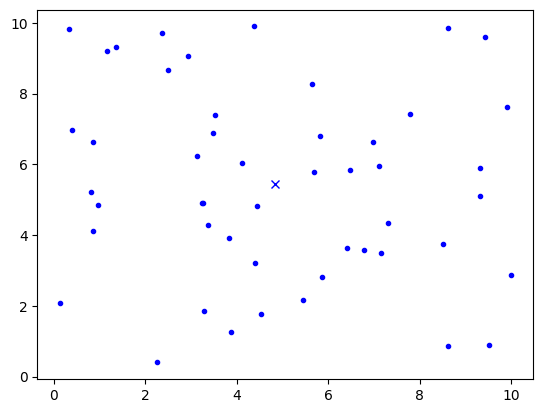

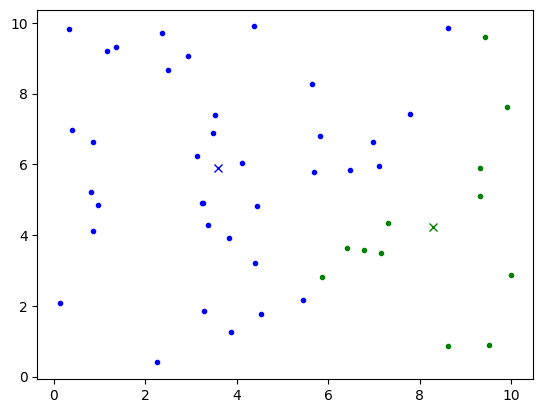

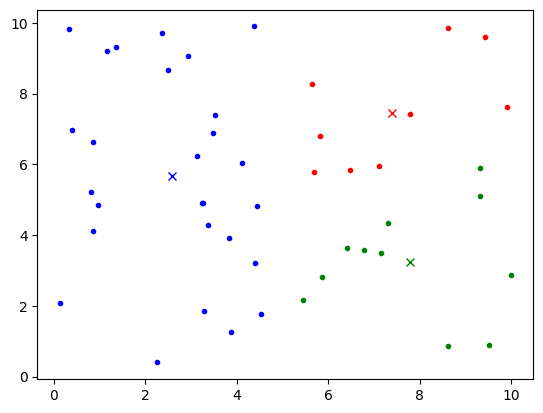

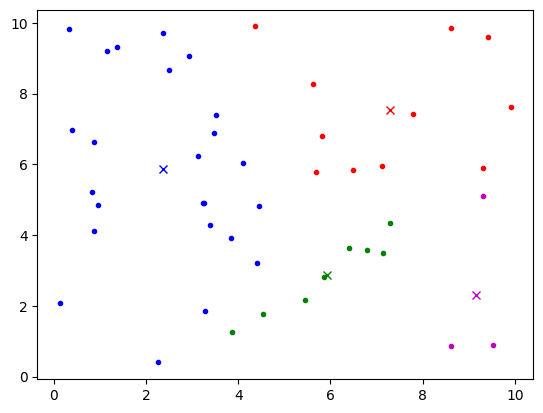

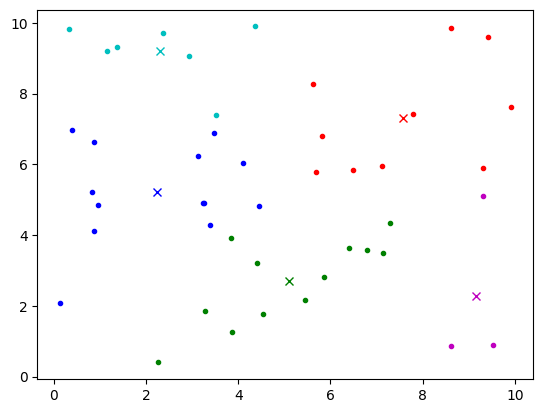

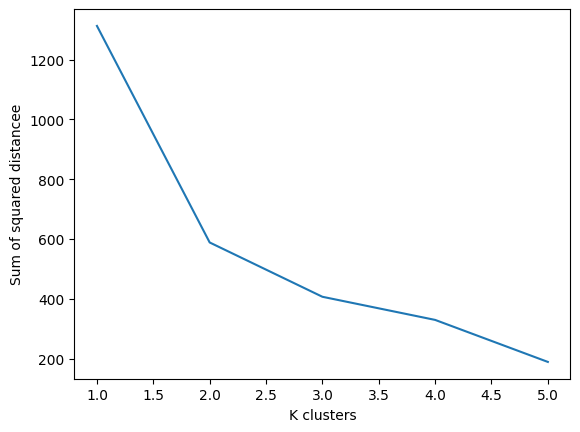

Point x= 4.444874394299141 ,y= 4.832033989653275  is assigned to the wrong clusters. Blue -> Blue
Point x= 9.309086582340425 ,y= 5.114200855977289  is assigned to the wrong clusters. magenta  -> red


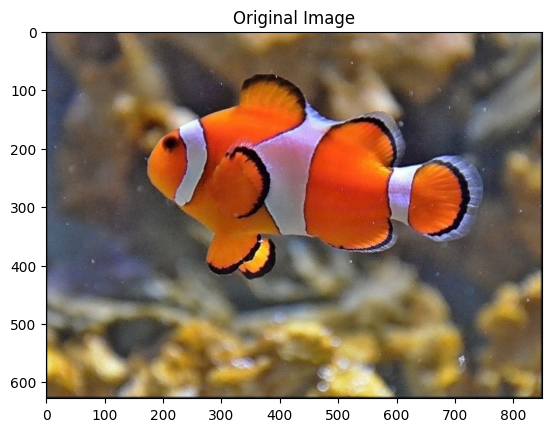

Height: 628
Width: 850
Number of colour channels: 3
Shape of image array: (533800, 3)


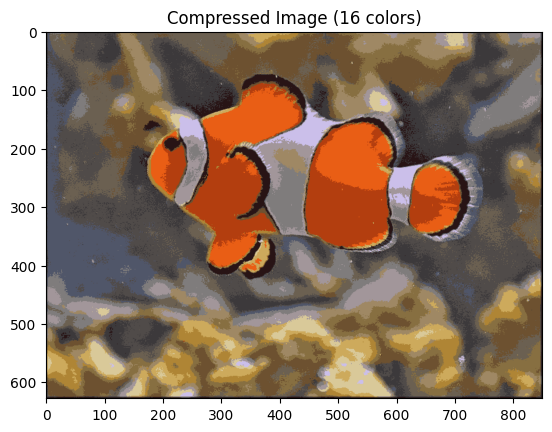

In [67]:
from random import *
from math import *
#from turtle import *
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.image as img
from sklearn.cluster import KMeans



"""
def PrintPlan(NewOrAll):
  up()

  if NewOrAll=="All":
    goto(300,-300)
    down()
    goto(-300,-300)
    goto(-300,300)
    NbFor=len(Point)
  elif NewOrAll=="New" or NewOrAll=="End"  :
    NbFor=k

  else : return("Ereure")
  for i in range(NbFor):
    up()
    goto(Point[i][0]*60-300,Point[i][1]*60-300)
    if len(Point[i][2])!=1:#If the point is  a ref kenel point
      if NewOrAll=="End":
        dot(10,"Black")
      else:
        dot(10,color[i])
    else:
        dot(5,color[int(Point[i][2][0])])
    down()

"""

color2=["Blue","green","red","magenta ","cyan","gray","yellow","orange","violet","pink"]
color=['b','g','r','m','c','y','k']
def PrintMatP():


  for i in range(len(Point)):
    if Point[i][3]==0:
      plt.plot(Point[i][0],Point[i][1],'o'+color[int(Point[i][2][0])])
    elif Point[i][3]==-1:
      plt.plot(Point[i][0],Point[i][1],'x'+color[int(Point[i][2][0])])
    else:
      plt.plot(Point[i][0],Point[i][1],'.'+color[int(Point[i][2][0])])

def average(k):
    CountAverage=[]
    for i in range(k):
        CountAverage.append([0,0,0])# sum x by color/K, sum y by color/K, number of points
    for i in range(len(Point)):
        CountAverage[int(Point[i][2][0])][0]+=Point[i][0]# sum X
        CountAverage[int(Point[i][2][0])][1]+=Point[i][1]# sum Y
        CountAverage[int(Point[i][2][0])][2]+=1# add 1 point
    for i in CountAverage:
        i[0]=i[0]/i[2]
        i[1]=i[1]/i[2]

    for i in range (k):
        Point[i][0]=CountAverage[i][0]
        Point[i][1]=CountAverage[i][1]
        Point[i][3]=-1
    return(Point)


def init():
  for i in range(nb_point):
    x=random()*10
    y=random()*10
    Point.append([x,y,'K_ref','distance'])

def reboot(k):
  k_distance.append(0)
  for i in range(nb_point):
      if i<k:
          Point[i][2]=str(i)+" myself"
          Point[i][3]=0

  for i in range(len(Point)):
      distance_min=1000
      K_ref_min="init"
      for j in range(k):
          d=sqrt((Point[i][0]-Point[j][0])**2+(Point[i][1]-Point[j][1])**2)
          if distance_min>d:
              distance_min=d
              K_ref_min=j
      if distance_min!=0:
          Point[i][2]=str(K_ref_min)
      Point[i][3]=distance_min
      k_distance[-1]+=distance_min**2

def choose_best_k ():
  plt.plot(np.linspace(1, nb_k,nb_k),k_distance)
  plt.xlabel("K clusters")
  plt.ylabel("Sum of squared distancee")

  delta=[]
  for i in range (len(k_distance)-1):
    delta.append(k_distance[i]-k_distance[i+1])
  plt.show()



def Silhouette_analysis():
  diss=[]
  for i in range(len(Point)):
    diss.append([])
    for k in range(nb_k):
      diss[i].append(((Point[k][0]-Point[i][0])**2+(Point[k][1]-Point[i][1])**2)**0.5)
    ai=diss[i][int(Point[i][2][0])]
    del(diss[i][int(Point[i][2][0])])
    bi=min(diss[i])
    analysis=(bi-ai)/(max(ai,bi))
    if analysis<0:
      print("Point x=",Point[i][0],",y=",Point[i][1]," is assigned to the wrong clusters.",color2[int(Point[i][2][0])],"->",color2[diss[i].index(bi)])






Point=[] #List of points with their membership in the closest cluster as well as the distance between them
nb_point=50
k_distance=[]
nb_k=5



init()
for k in range (1,nb_k+1):
  reboot(k)
  for i in range(4):
    average(k)
  PrintMatP()
  plt.show()
choose_best_k ()
Silhouette_analysis()







image = img.imread("/content/drive/MyDrive/Colab Notebooks/Data/fish.jpg")


plt.imshow(image)
plt.title("Original Image")
plt.show()

height, width, channels = image.shape
print("Height:", height)
print("Width:", width)
print("Number of colour channels:", channels)

pixels = image.reshape(-1, channels)
print("Shape of image array:", pixels.shape)
n_colors = 16
kmeans = KMeans(n_clusters=n_colors, n_init=10)
kmeans.fit(pixels)
new_colors = kmeans.cluster_centers_.astype(int)
compressed_pixels = new_colors[kmeans.labels_]
compressed_image = compressed_pixels.reshape(height, width, channels)

plt.imshow(compressed_image)
plt.title("Compressed Image ({} colors)".format(n_colors))
plt.show()
